In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_daily.csv')

In [3]:
data.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [4]:
data.tail()

,# Date,Receipt_Count
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644
364,2021-12-31,10211187


In [5]:
data.isna().sum()

# Date           0
Receipt_Count    0
dtype: int64

In [6]:

df = pd.DataFrame(data=data)

In [7]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [8]:
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df.rename(columns = {'# Date':'Date', 'Receipt_Count' : 'Receipt'}, inplace = True)
df

Shape of the data=  (365, 2)
Column datatypes= 
 # Date           object
Receipt_Count     int64
dtype: object


,Date,Receipt
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
...,...,...
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644


In [9]:
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Receipt    int64
dtype: object


,Receipt
Date,
2021-01-01,7564766
2021-01-02,7455524
2021-01-03,7095414
2021-01-04,7666163
2021-01-05,7771289
...,...
2021-12-27,10350408
2021-12-28,10219445
2021-12-29,10313337


Text(0.5, 1.0, 'Trend of the Time Series')

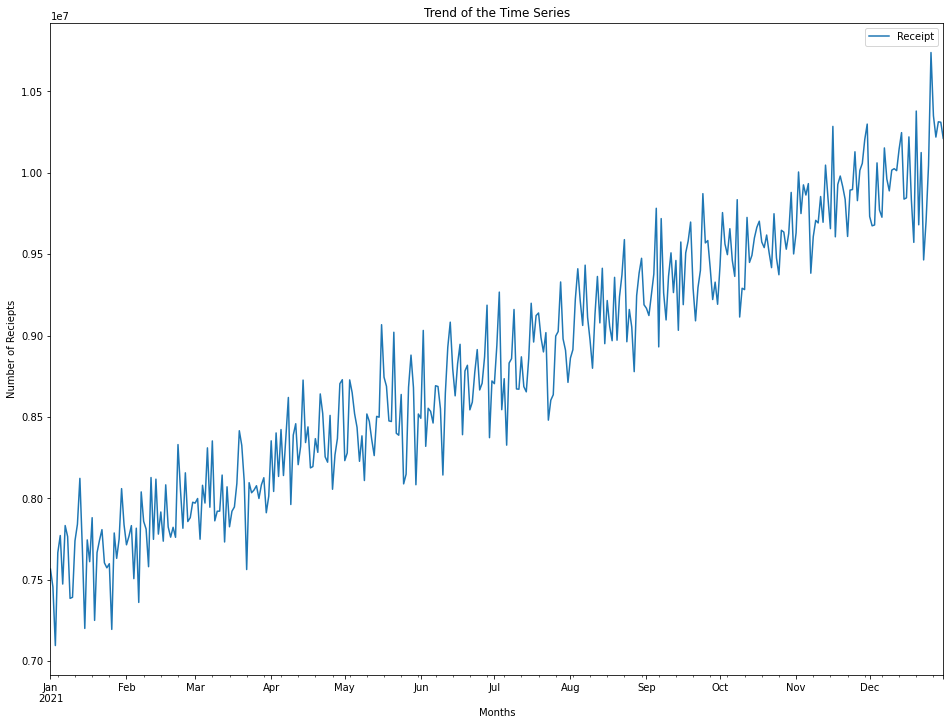

In [10]:
df.plot(figsize = (16,12))
plt.plot(df)
plt.xlabel('Months')
plt.ylabel('Number of Reciepts')
plt.title('Trend of the Time Series')

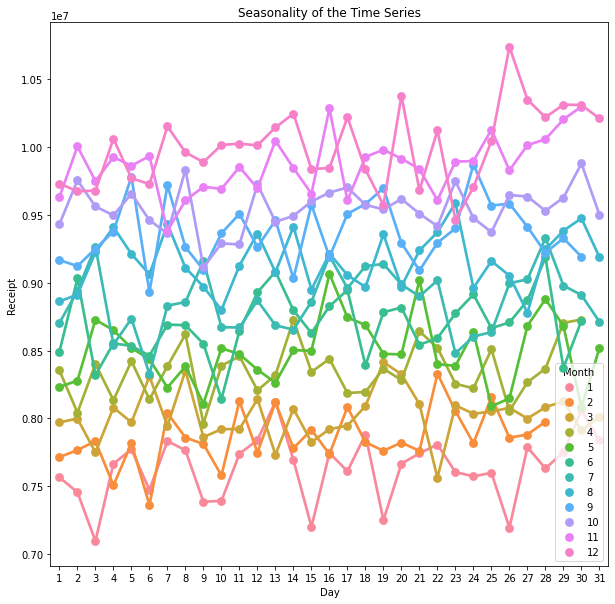

In [11]:
df_temp = df.copy()
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
df_temp['Day'] = pd.DatetimeIndex(df_temp.index).day
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Day',y='Receipt',hue='Month',data=df_temp)

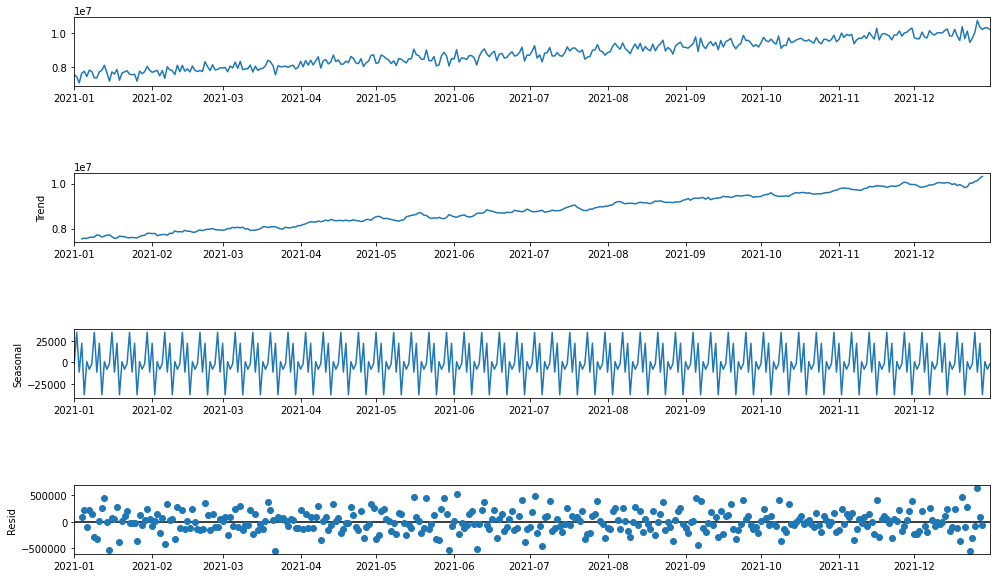

In [12]:
import statsmodels.api as sm


decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()
fig.set_size_inches((16, 9))

In [13]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [18]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)
    if df_output[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

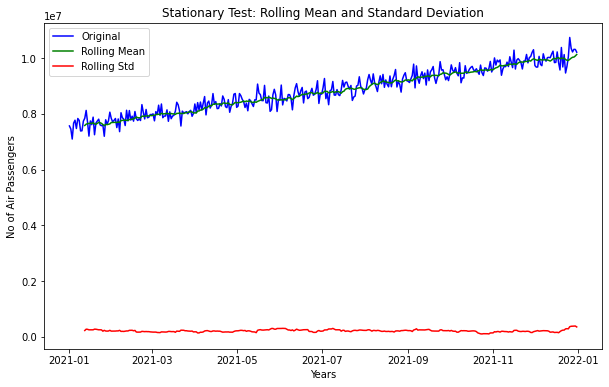

Results of Dickey-Fuller Test
Test Statistic                   0.175044
p-value                          0.970827
Lags Used                       17.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
stationarity_test(df)

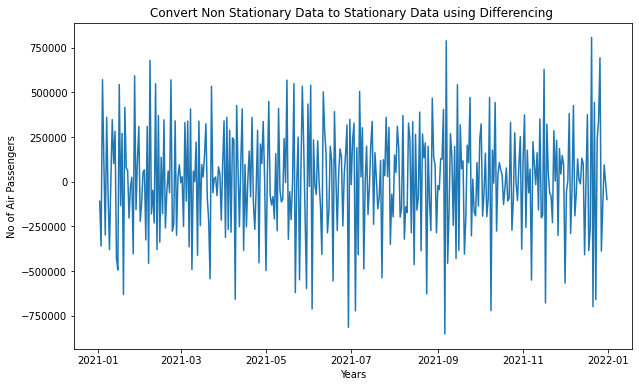

In [20]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

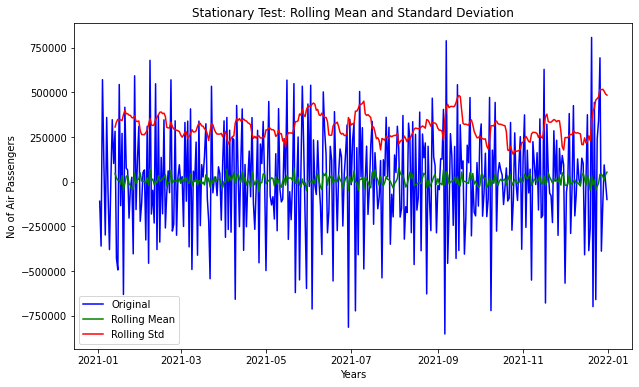

Results of Dickey-Fuller Test
Test Statistic                -8.889819e+00
p-value                        1.251287e-14
Lags Used                      1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

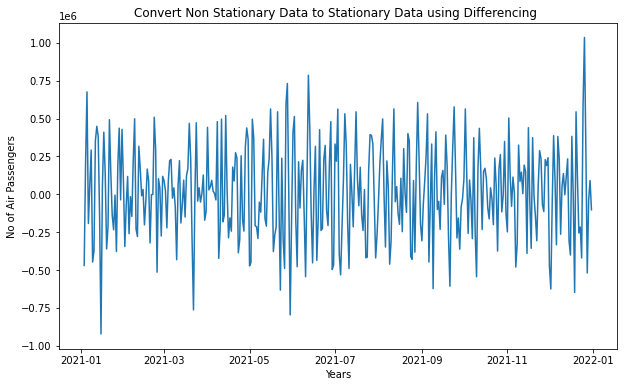

In [22]:
df_diff = df.diff(periods = 2) # Second order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

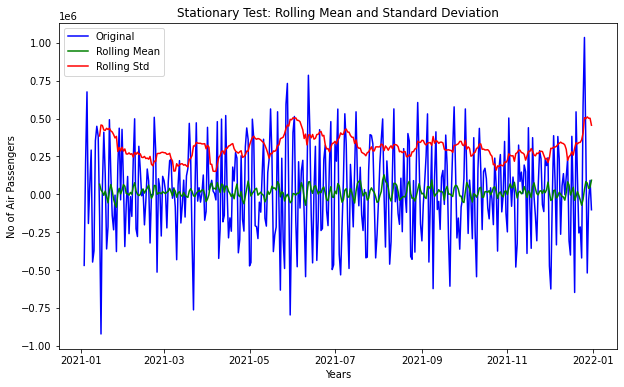

Results of Dickey-Fuller Test
Test Statistic                -9.339916e+00
p-value                        8.853861e-16
Lags Used                      1.500000e+01
Number of Observations Used    3.470000e+02
Critical Value (1%)           -3.449337e+00
Critical Value (5%)           -2.869906e+00
Critical Value (10%)          -2.571227e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

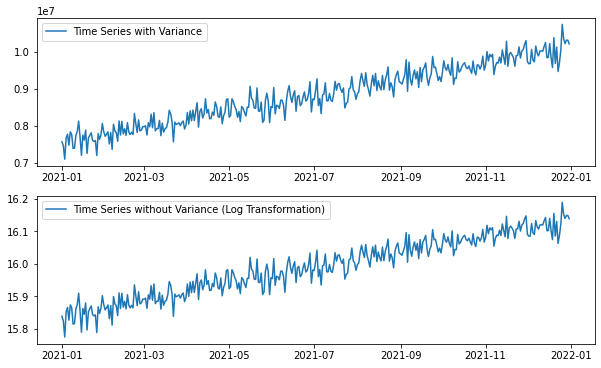

In [60]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

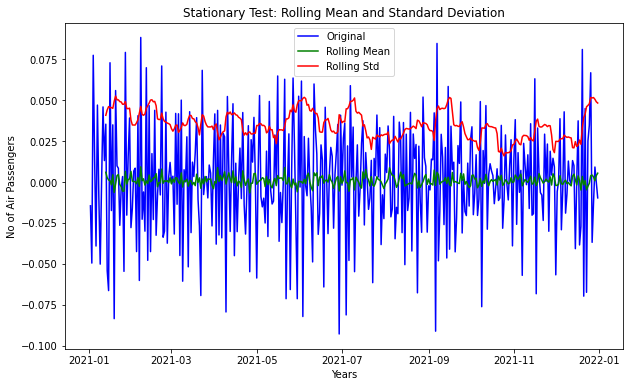

Results of Dickey-Fuller Test
Test Statistic                -8.681140e+00
p-value                        4.282880e-14
Lags Used                      1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [61]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

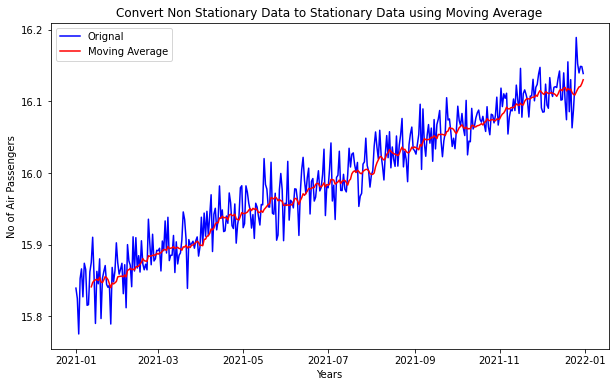

In [62]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

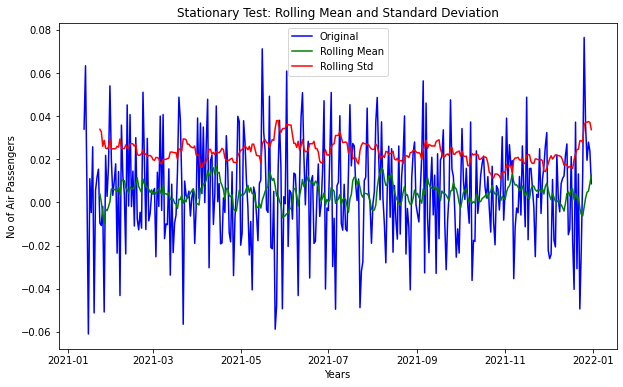

Results of Dickey-Fuller Test
Test Statistic                -9.070365e+00
p-value                        4.318693e-15
Lags Used                      9.000000e+00
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [63]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

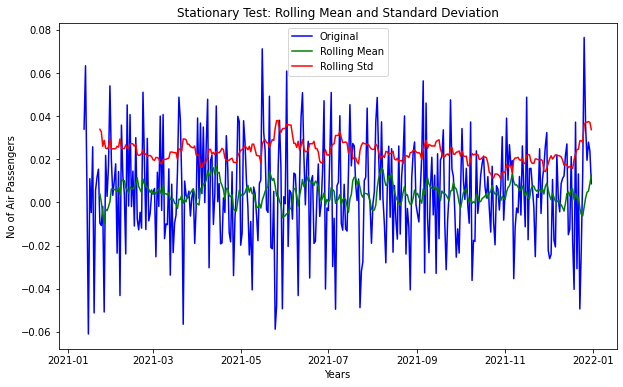

Results of Dickey-Fuller Test
Test Statistic                -9.070365e+00
p-value                        4.318693e-15
Lags Used                      9.000000e+00
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [64]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

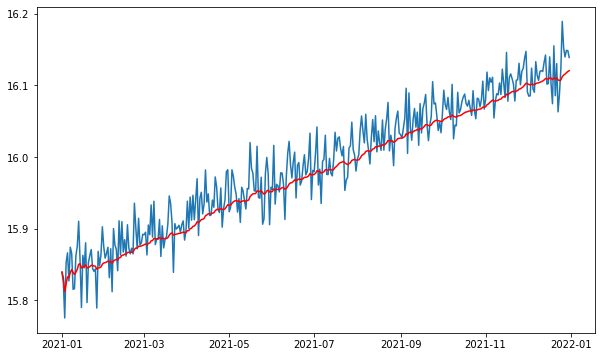

In [65]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

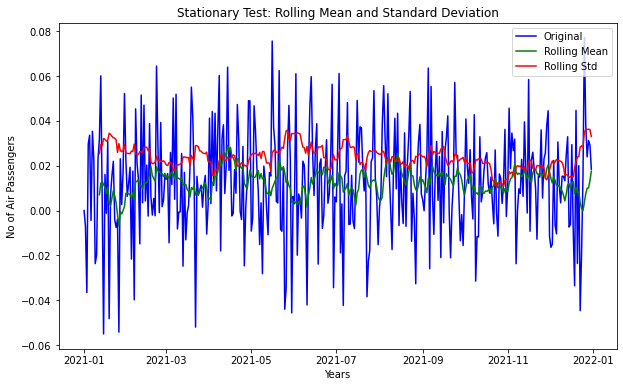

Results of Dickey-Fuller Test
Test Statistic                -1.305269e+01
p-value                        2.125846e-24
Lags Used                      2.000000e+00
Number of Observations Used    3.620000e+02
Critical Value (1%)           -3.448544e+00
Critical Value (5%)           -2.869557e+00
Critical Value (10%)          -2.571041e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [66]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

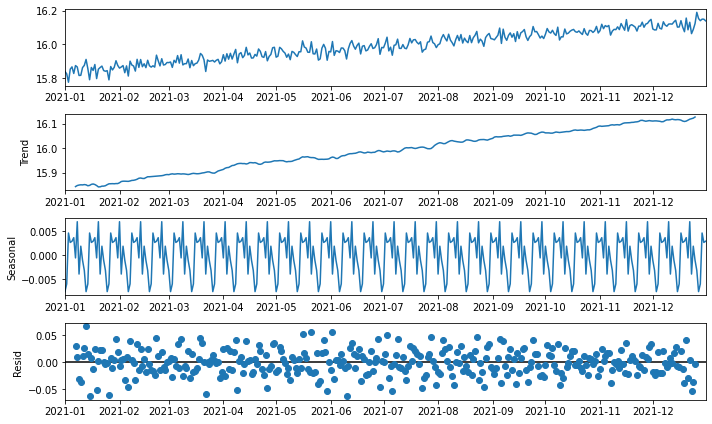

In [67]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

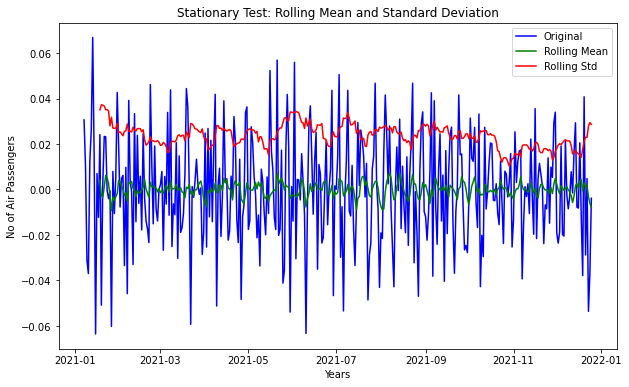

Results of Dickey-Fuller Test
Test Statistic                -9.608428e+00
p-value                        1.839285e-16
Lags Used                      1.700000e+01
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [68]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


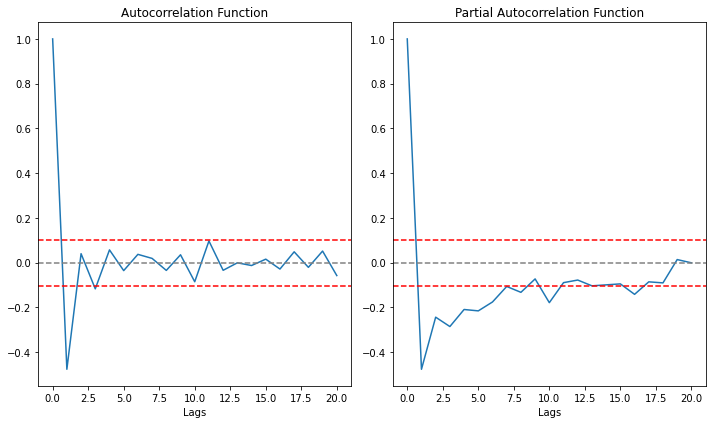

In [69]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'AR Model, RSS: 0.3378')

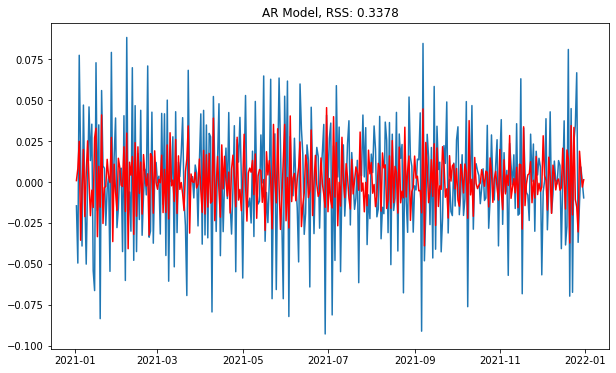

In [70]:
model = ARIMA(df_log, order=(1, 1, 0), freq = 'D')  
results_AR = model.fit(disp= -1) # If disp < 0 convergence information will not be printed
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log_diff['Receipt'])**2))

Text(0.5, 1.0, 'MA Model, RSS: 0.2315')

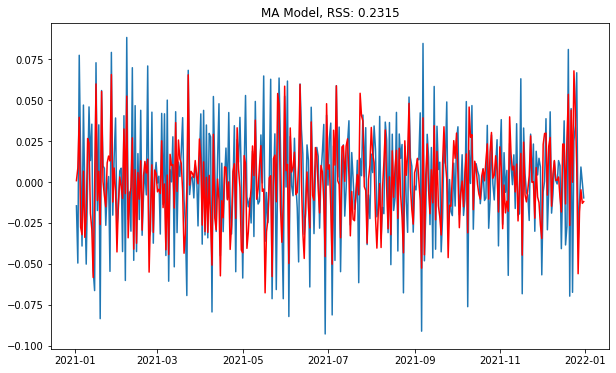

In [71]:
#MA Model
#Since 'p' is AR model parameter we will keep its value as '0'.

model = ARIMA(df_log, order=(0, 1, 1), freq = 'D')  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff['Receipt'])**2))

Text(0.5, 1.0, 'Combined Model, RSS: 0.2312')

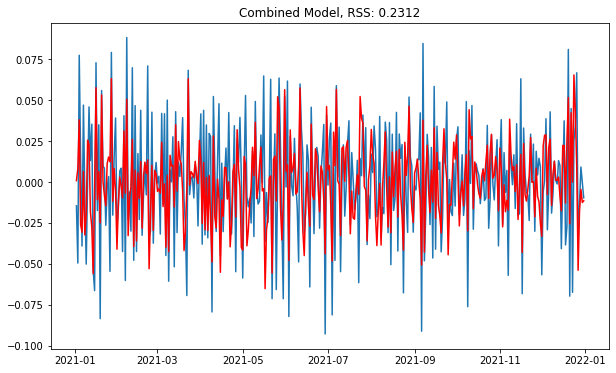

In [72]:
#combined
model = ARIMA(df_log, order=(1, 1, 1), freq = 'D')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Receipt'])**2))

In [73]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  364


Date
2021-01-02    0.000810
2021-01-03    0.008205
2021-01-04    0.037908
2021-01-05   -0.026147
2021-01-06   -0.030651
dtype: float64

In [74]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Date
2021-01-02    0.000810
2021-01-03    0.009015
2021-01-04    0.046923
2021-01-05    0.020776
2021-01-06   -0.009876
dtype: float64

In [75]:
predictions_log = pd.Series(df_log['Receipt'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Date
2021-01-01    15.839012
2021-01-02    15.839822
2021-01-03    15.848027
2021-01-04    15.885935
2021-01-05    15.859788
dtype: float64

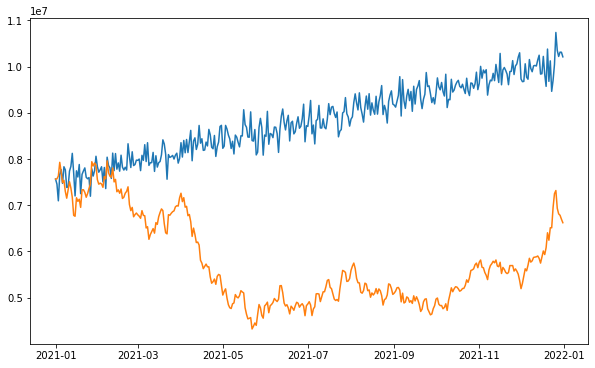

In [76]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

In [77]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Date,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
Receipt,7564766.0,7.455524e+06,7.095414e+06,7.666163e+06,7.771289e+06,7.473320e+06,7.832624e+06,7.765028e+06,7.385245e+06,7.392087e+06,...,1.012424e+07,9.464659e+06,9.703857e+06,1.004590e+07,1.073887e+07,1.035041e+07,1.021945e+07,1.031334e+07,1.031064e+07,1.021119e+07
Predicted Values,7564766.0,7.570896e+06,7.633271e+06,7.928186e+06,7.723573e+06,7.490426e+06,7.538475e+06,7.298724e+06,7.152313e+06,7.337198e+06,...,6.512072e+06,6.511408e+06,6.951303e+06,7.249492e+06,7.317946e+06,6.933895e+06,6.812956e+06,6.782110e+06,6.697671e+06,6.621333e+06


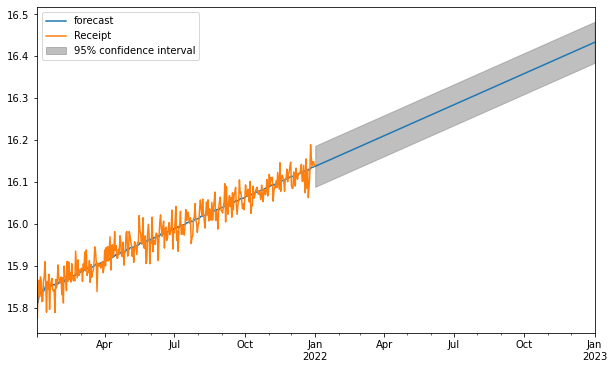

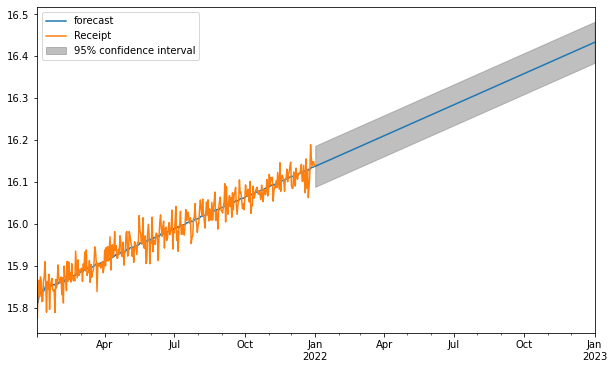

In [78]:
results_ARIMA.plot_predict(start = 1, end= 730) 

In [79]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_ARIMA.forecast(steps = 365)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("2022-01-01", "2022-12-31", freq="D")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Date'] = forecast_date_range

df_forecast[['Date', 'Forecast']]

,Date,Forecast
0,2022-01-01,1.019744e+07
1,2022-01-02,1.020489e+07
2,2022-01-03,1.021313e+07
3,2022-01-04,1.022140e+07
4,2022-01-05,1.022969e+07
...,...,...
360,2022-12-27,1.364884e+07
361,2022-12-28,1.365990e+07
362,2022-12-29,1.367097e+07
363,2022-12-30,1.368205e+07


In [80]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(df['Receipt'])

ADF Statistics: 0.17504416572005643
p- value: 0.9708266454651425
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
df['Receipt First Difference']=df['Receipt']-df['Receipt'].shift(1)

In [82]:
df.head()

,Receipt,Receipt First Difference
Date,,
2021-01-01,7564766,NaN
2021-01-02,7455524,-109242.0
2021-01-03,7095414,-360110.0
2021-01-04,7666163,570749.0
2021-01-05,7771289,105126.0


In [83]:
adf_test(df['Receipt First Difference'].dropna())

ADF Statistics: -8.889819175651178
p- value: 1.2512872154225125e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [85]:
df['Receipt 12 Difference']=df['Receipt']-df['Receipt'].shift(12)

adf_test(df['Receipt 12 Difference'].dropna())

ADF Statistics: -8.064166191028791
p- value: 1.6129571402047198e-12
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


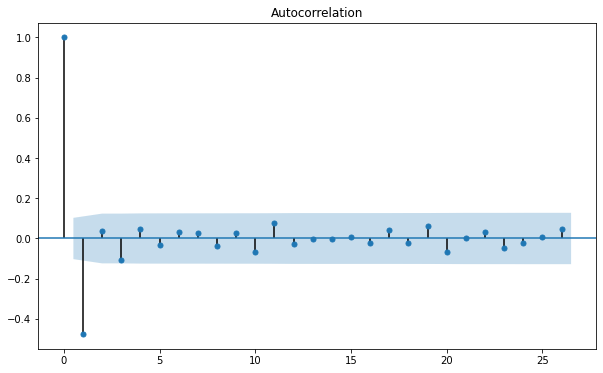

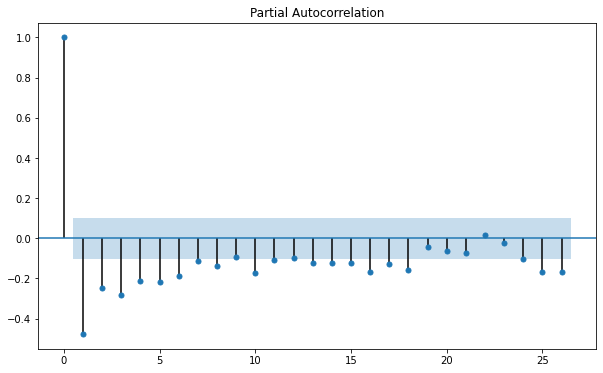

In [89]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf12 = plot_acf(df["Receipt First Difference"].dropna())
pacf12 = plot_pacf(df["Receipt First Difference"].dropna())

In [88]:
df

,Receipt,Receipt First Difference,Receipt 12 Difference
Date,,,
2021-01-01,7564766,NaN,NaN
2021-01-02,7455524,-109242.0,NaN
2021-01-03,7095414,-360110.0,NaN
2021-01-04,7666163,570749.0,NaN
2021-01-05,7771289,105126.0,NaN
...,...,...,...
2021-12-27,10350408,-388457.0,512301.0
2021-12-28,10219445,-130963.0,373541.0
2021-12-29,10313337,93892.0,92821.0
